<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-02-19 00:28:50--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-02-19 00:28:50 (12.9 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         156 KB  anaconda

The following packages will be UPDATED:

    ca-certificates: 2019.11.28-hecc5488_0 conda-forge --> 2020.1.1-0        anaconda
    certifi:         2019.11.28-py36_0     conda-forge --> 2019.11.28-py36_0 anaconda
    openssl:         1.1.1d-h516909a_0     conda-forge --> 1.1.1-h7b6447c_0  anaconda


certifi-2019.11.28   | 156 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


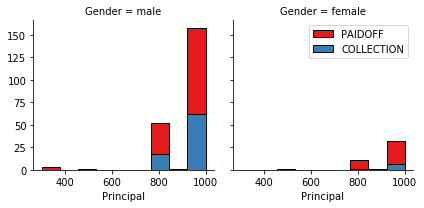

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

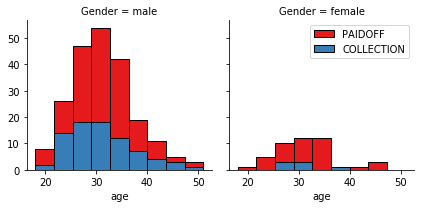

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

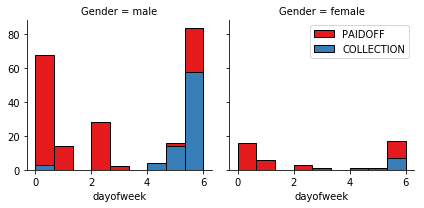

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

Split data into train/test

In [20]:
# Split data in train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

print('Check if the shape of X_train: ', X_train.shape, 'matches y_train: ', y_train.shape)
print('Check if the shape of X_test: ', X_test.shape, 'matches y_test: ', y_test.shape)

Check if the shape of X_train:  (242, 8) matches y_train:  (242,)
Check if the shape of X_test:  (104, 8) matches y_test:  (104,)


Finding the optimal k value to use

In [21]:
# Finding optimal value for K
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Try number of Ks = 20
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.71153846, 0.625     , 0.72115385, 0.72115385, 0.73076923,
       0.71153846, 0.72115385, 0.72115385, 0.75      , 0.68269231,
       0.69230769, 0.71153846, 0.71153846, 0.72115385, 0.71153846,
       0.71153846, 0.72115385, 0.69230769, 0.70192308])

Plotting various Ks against accuracy to select optimal K

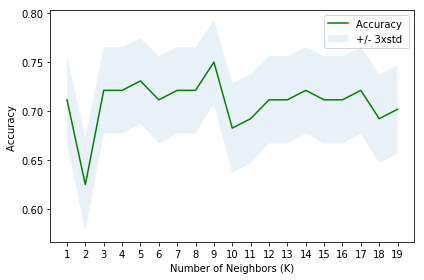

In [22]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.xticks(np.arange(1, Ks, 1))
plt.show()

We can observe from the plot above that K value corresponding to the highest model accuracy is K=9. Therefore, we can now build the prediction model with K=9.

In [23]:
# set up model
k = 9
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

In [24]:
# output model predictions
yhat = neigh.predict(X_test)

In [25]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7933884297520661
Test set Accuracy:  0.75


Evaluating the model using f1 score and Jaccard

In [26]:
#Set up confusion matrix
from sklearn.metrics import classification_report

print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

  COLLECTION       0.53      0.33      0.41        27
     PAIDOFF       0.79      0.90      0.84        77

   micro avg       0.75      0.75      0.75       104
   macro avg       0.66      0.61      0.63       104
weighted avg       0.72      0.75      0.73       104



In [27]:
from sklearn.metrics import f1_score
print('f1 score is:')
f1_score(y_test, yhat, average='weighted')

f1 score is:


0.7292128603104213

In [28]:
from sklearn.metrics import jaccard_similarity_score
print('Jaccard score is: ')
jaccard_similarity_score(y_test, yhat)

Jaccard score is: 


0.75

# Decision Tree

First, we find optimal depth of tree similar to what was done for selecting the K value for KNN model above.

In [29]:
from sklearn.tree import DecisionTreeClassifier

maxd = 20
mean_acc = np.zeros((maxd-1))
std_acc = np.zeros((maxd-1))
ConfustionMx = [];
for n in range(1,maxd):
    
    #Train Model and Predict  
    decTree = DecisionTreeClassifier(criterion="entropy", max_depth=n).fit(X_train,y_train)
    yhat=decTree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.74038462, 0.74038462, 0.74038462, 0.74038462, 0.74038462,
       0.74038462, 0.75      , 0.71153846, 0.70192308, 0.72115385,
       0.66346154, 0.66346154, 0.72115385, 0.68269231, 0.68269231,
       0.72115385, 0.72115385, 0.72115385, 0.71153846])

Plotting various depths against accuracy to select optimal depth to use in model

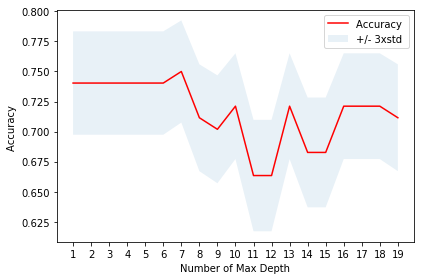

In [30]:
plt.plot(range(1,maxd),mean_acc,'r')
plt.fill_between(range(1,maxd),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Max Depth')
plt.tight_layout()
plt.xticks(np.arange(1, maxd, 1))
plt.show()

We can observe from the plot above that depth value corresponding to the highest model accuracy is depth=7. Therefore, we can now build the prediction model with depth=7.

In [31]:
# set up model
decTree = DecisionTreeClassifier(criterion="entropy", max_depth=7)
decTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
# model output
yhat = decTree.predict(X_test)

Evaluating the model using F1 and Jaccard

In [33]:
#Set up confusion matrix
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

  COLLECTION       0.57      0.15      0.24        27
     PAIDOFF       0.76      0.96      0.85        77

   micro avg       0.75      0.75      0.75       104
   macro avg       0.67      0.55      0.54       104
weighted avg       0.71      0.75      0.69       104



In [34]:
print('f1 score is:')
f1_score(y_test, yhat, average='weighted')

f1 score is:


0.6908384043272482

In [35]:
print('Jaccard score is: ')
jaccard_similarity_score(y_test, yhat)

Jaccard score is: 


0.75

Visualizing the decision tree

In [36]:
# unhash if needed
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge

The following packages will be UPDATED:

    certifi:         2019.11.28-py36_0 anaconda --> 2019.11.28-py36_0     conda-forge

The following packages will be DOWNGRADED:

    ca-certificates: 2020.1.1-0        anaconda --> 2019.11.28-hecc5488_0 conda-forge
    openssl:         1.1.1-h7b6447c_0  anaconda --> 1.1.1d-h516909a_0     conda-forge


certifi-2019.11.28   | 149 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

# All requested packages already installed.



In [37]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

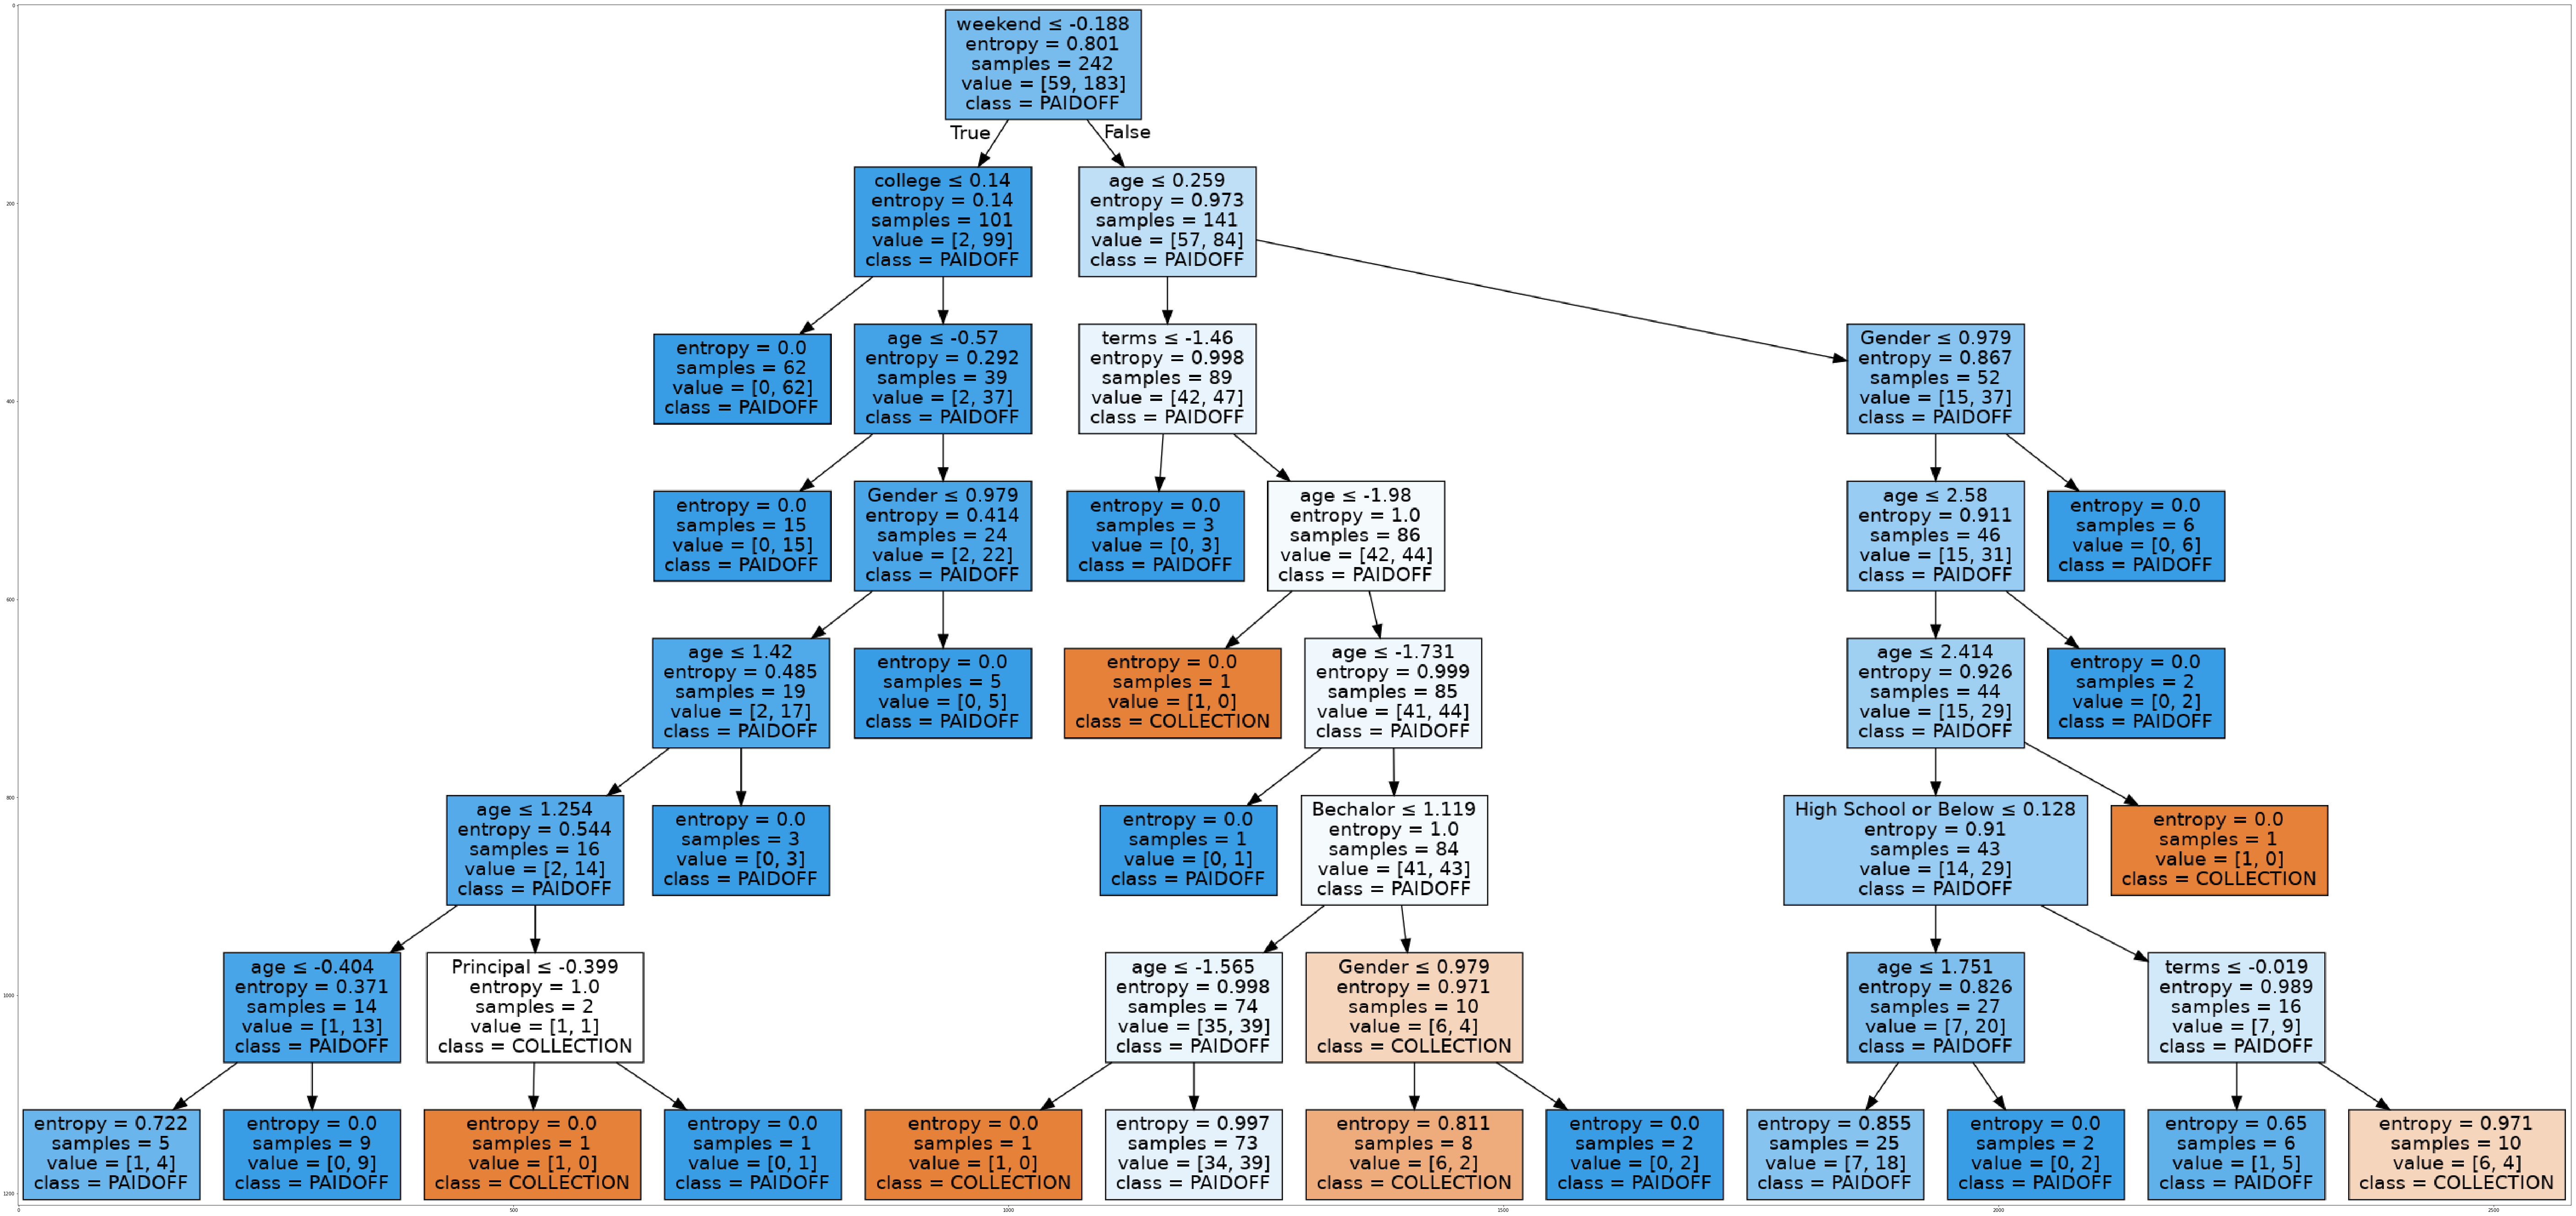

In [38]:
dot_data = StringIO()
filename = "dectree.png"
featureNames = Feature.columns
targetNames = df["loan_status"].unique().tolist()
out=tree.export_graphviz(decTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine

First, we find optimal kernel for our SVM model between the following:

1. Linear
2. Polynomial
3. RBF
4. Sigmoid

In [39]:
from sklearn import svm

#Linear
svm1 = svm.SVC(kernel='linear').fit(X_train, y_train)
yhat1 = svm1.predict(X_test)
a1 = metrics.accuracy_score(y_test, yhat1)

#polynomial
svm2 = svm.SVC(kernel='poly').fit(X_train, y_train)
yhat2 = svm2.predict(X_test)
a2 = metrics.accuracy_score(y_test, yhat2)

#RBF
svm3 = svm.SVC(kernel='rbf').fit(X_train, y_train)
yhat3 = svm3.predict(X_test)
a3 = metrics.accuracy_score(y_test, yhat3)

#Sigmoid
svm4 = svm.SVC(kernel='sigmoid').fit(X_train, y_train)
yhat4 = svm4.predict(X_test)
a4 = metrics.accuracy_score(y_test, yhat4)

print(a1, a2, a3, a4)

0.7403846153846154 0.75 0.75 0.7115384615384616


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


We observe that the polynomial and RBF kernels produce the joint-best accuracy results (0.75). For the purposes of continuing this exercise, we select the RBF kernel.

In [40]:
# set up model
f_svm = svm.SVC(kernel='rbf').fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [41]:
# predicting model outputs
yhat = f_svm.predict(X_test)

In [42]:
# compute train & test accuracies of model
print("Train set Accuracy: ", metrics.accuracy_score(y_train, f_svm.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7603305785123967
Test set Accuracy:  0.75


Evaluating the model using F1 and Jaccard

In [43]:
#Set up confusion matrix
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

  COLLECTION       1.00      0.04      0.07        27
     PAIDOFF       0.75      1.00      0.86        77

   micro avg       0.75      0.75      0.75       104
   macro avg       0.87      0.52      0.46       104
weighted avg       0.81      0.75      0.65       104



In [44]:
print('f1 score is:')
f1_score(y_test, yhat, average='weighted')

f1 score is:


0.651984126984127

In [45]:
print('Jaccard score is: ')
jaccard_similarity_score(y_test, yhat)

Jaccard score is: 


0.75

# Logistic Regression

We will first need to select the optimal solver for our model between the following:

1. newton-cg
2. lbfgs
3. liblinear
4. sag
5. saga

In [46]:
from sklearn.linear_model import LogisticRegression

#newton-cg
LR1 = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)
yhat1 = LR1.predict(X_test)
a1 = metrics.accuracy_score(y_test, yhat1)

#lbfgs
LR2 = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train,y_train)
yhat2 = LR2.predict(X_test)
a2 = metrics.accuracy_score(y_test, yhat2)

#liblinear
LR3 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat3 = LR3.predict(X_test)
a3 = metrics.accuracy_score(y_test, yhat3)

#sag
LR4 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat4 = LR4.predict(X_test)
a4 = metrics.accuracy_score(y_test, yhat4)

#saga
LR5 = LogisticRegression(C=0.01, solver='saga').fit(X_train,y_train)
yhat5 = LR5.predict(X_test)
a5 = metrics.accuracy_score(y_test, yhat5)

print(a1, a2, a3, a4, a5)

0.7403846153846154 0.7403846153846154 0.7211538461538461 0.7403846153846154 0.7403846153846154


We have four solvers tied for best accuracy, therefore we need an alternative way to determine which solver to use. Below we run the test to check the predicted labels - whether both 'COLLECTION' and 'PAIDOFF' are predicted. The model is probably not very good if it only outputs one of these labels for all the data.

In [47]:
# Find if labels are missing in the models 
print("The label missing in newton-cg solver",set(y_test) - set(yhat1))
print("The label missing in lbfgs solver",set(y_test) - set(yhat2))
print("The label missing in liblinear solver",set(y_test) - set(yhat3))
print("The label missing in sag solver",set(y_test) - set(yhat4))
print("The label missing in saga solver",set(y_test) - set(yhat5))

The label missing in newton-cg solver {'COLLECTION'}
The label missing in lbfgs solver {'COLLECTION'}
The label missing in liblinear solver set()
The label missing in sag solver {'COLLECTION'}
The label missing in saga solver {'COLLECTION'}


We observe from the above output that the only solver which outputs prediction labels with both 'COLLECTION' and 'PAIDOFF' is the liblinear solver. Hence we select this for our model.

In [48]:
# set up model
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [49]:
#model output predictions
yhat = LR.predict(X_test)

Similar to the above models, we check for model train & test accuracy

In [50]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7644628099173554
Test set Accuracy:  0.7211538461538461


Evaluating the model using F1 and Jaccard

In [51]:
#Set up confusion matrix
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

  COLLECTION       0.33      0.07      0.12        27
     PAIDOFF       0.74      0.95      0.83        77

   micro avg       0.72      0.72      0.72       104
   macro avg       0.54      0.51      0.48       104
weighted avg       0.64      0.72      0.65       104



In [52]:
print('f1 score is:')
f1_score(y_test, yhat, average='weighted')

f1 score is:


0.649160839160839

In [53]:
print('Jaccard score is: ')
jaccard_similarity_score(y_test, yhat)

Jaccard score is: 


0.7211538461538461

For logistic regression, we can also use log loss as a means to evaluate the model

In [54]:
#obtain prediction probabilities for log loss evaluation
yhat_prob = LR.predict_proba(X_test)

In [55]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5762236891512358

# Model Evaluation using Test set

In [56]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [57]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-02-19 00:41:40--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-02-19 00:41:40 (366 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [58]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


As with previous tutorials, check the shape of the test set

In [59]:
print('The shape of this test set is: ', test_df.shape)

The shape of this test set is:  (54, 10)


Adapting code from previous tutorials to clean up the data

In [60]:
# creating a column to check whether loan_status is affected by end of the week or not
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['end_of_week'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

# changing gender values to numerical instead of categorical
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

# selecting feature set for testing
Feature_test = test_df[['Principal','terms','age','Gender','end_of_week']]

# checking for tertiary education is sufficient
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)
Feature_test.head()

,Principal,terms,age,Gender,end_of_week,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


Create testing dataframes and normalizing data

In [61]:
test_X = Feature_test
test_y = test_df['loan_status'].apply(lambda loan_status: 0 if loan_status == 'PAIDOFF' else 1)

#we will also need to convert y to numerical values
y = df['loan_status'].apply(lambda loan_status: 0 if loan_status == 'PAIDOFF' else 1)

In [62]:
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

Now we can run the model through the test set and evaluate

KNN

In [63]:
final_neigh = KNeighborsClassifier(n_neighbors = 9).fit(X,y)
yhat_knn = final_neigh.predict(test_X)
print("Train set Accuracy: ", metrics.accuracy_score(y, final_neigh.predict(X)))
print("Test set Accuracy: ", metrics.accuracy_score(test_y, yhat_knn))

Train set Accuracy:  0.8034682080924855
Test set Accuracy:  0.7037037037037037


In [64]:
knn_jaccard = jaccard_similarity_score(test_y,yhat_knn)
knn_f1 = f1_score(test_y,yhat_knn,average='weighted')
print("KNN Jaccard score: ", knn_jaccard)
print("KNN F1 score: ", knn_f1)

KNN Jaccard score:  0.7037037037037037
KNN F1 score:  0.6736355806123249


Decision Tree

In [65]:
final_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
final_Tree.fit(X,y)
yhat_tree = final_Tree.predict(test_X)
print("Train set Accuracy: ", metrics.accuracy_score(y, final_Tree.predict(X)))
print("Test set Accuracy: ", metrics.accuracy_score(test_y, yhat_tree))

Train set Accuracy:  0.8005780346820809
Test set Accuracy:  0.7592592592592593


In [66]:
tree_jaccard = jaccard_similarity_score(test_y,yhat_tree)
tree_f1 = f1_score(test_y,yhat_tree,average='weighted')
print("Tree Jaccard score: ", tree_jaccard)
print("Tree F1 score: ", tree_f1)

Tree Jaccard score:  0.7592592592592593
Tree F1 score:  0.7401723974614001


SVM

In [67]:
final_svm = svm.SVC(kernel='rbf')
final_svm.fit(X, y)
yhat_svm = final_svm.predict(test_X)
print("Train set Accuracy: ", metrics.accuracy_score(y, final_svm.predict(X)))
print("Test set Accuracy: ", metrics.accuracy_score(test_y, yhat_svm))

Train set Accuracy:  0.7601156069364162
Test set Accuracy:  0.7222222222222222


In [68]:
svm_jaccard = jaccard_similarity_score(test_y,yhat_svm)
svm_f1 = f1_score(test_y,yhat_svm,average='weighted')
print("SVM Jaccard score: ", svm_jaccard)
print("SVM F1 score: ", svm_f1)

SVM Jaccard score:  0.7222222222222222
SVM F1 score:  0.6212664277180406


Logistic Regression

In [69]:
final_LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,y)
yhat_LR = final_LR.predict(test_X)
print("Train set Accuracy: ", metrics.accuracy_score(y, final_LR.predict(X)))
print("Test set Accuracy: ", metrics.accuracy_score(test_y, yhat_LR))

Train set Accuracy:  0.7485549132947977
Test set Accuracy:  0.7407407407407407


In [70]:
lr_jaccard = jaccard_similarity_score(test_y,yhat_LR)
lr_log_loss = log_loss(test_y,final_LR.predict_proba(test_X))
lr_f1 = f1_score(test_y,yhat_LR,average='weighted')
print("LR Jaccard score: ", lr_jaccard)
print("LR Logloss score: ", lr_log_loss)
print("LR F1 score: ", lr_f1)

LR Jaccard score:  0.7407407407407407
LR Logloss score:  0.5566084946309208
LR F1 score:  0.6304176516942475


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

Filling out the table for report

In [71]:
Jaccard = [knn_jaccard,tree_jaccard,svm_jaccard,lr_jaccard]
F1_score = [knn_f1,tree_f1,svm_f1,lr_f1]
Log_Loss = ['NA','NA','NA',lr_log_loss]

    
df = {'Algorithm': ['KNN', 'Decistion Tree', 'SVM', 'LogisticRegression'], \
     'Jaccard': Jaccard, 'F1-score': F1_score, 'LogLoss': Log_Loss}

Report = pd.DataFrame(data=df, columns=['Algorithm', 'Jaccard', 'F1-score', 'LogLoss'], index=None)
Report

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.703704,0.673636,NA
1,Decistion Tree,0.759259,0.740172,NA
2,SVM,0.722222,0.621266,NA
3,LogisticRegression,0.740741,0.630418,0.556608


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>